# Problem Set 1
Due April 11th at 5:30pm -- at the start of the class so we can
discuss the solutions in class.

### Before You Start

Make sure to at least take a basic tutorial in the IPython notebook,
otherwise you'll be totally lost.  For this problem set, you should
download flights.csv.bz2 and weather.csv.bz2 datasets from
Canvas (files-data).   Rename the notebook to
LASTNAME_FIRSTNAME-PS1.ipynb.

When done, please submit
1. the notebook itself
2. the rendered html or pdf of it.



## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.


## Preliminaries

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [115]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.1.0 (need at least 1.0)
Numpy version:        1.13.3 (need at least 1.7.1)
SciPy version:        0.19.1 (need at least 0.12.0)
Pandas version:       0.20.3 (need at least 0.11.0)
Mapltolib version:     2.1.0 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


In [142]:
## Let's read the data and print some summary information
## adjust the path for your file system!
flights_df= pd.read_csv('/Users/manasi/Desktop/flights.csv')

In [117]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [118]:
flights_df.dest.unique()
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
#Selecting destination as SEA
flights_df[flights_df['dest'] == 'SEA'].count()['dest']

3923

 There were 3923 flights from NYC airports to Seattle in 2013.

(b) How many airlines fly from NYC to Seattle?

In [121]:
#Selecting destination as SEA and finding Unique characters
airlines_df=flights_df[flights_df['dest']=='SEA'].carrier.unique()
len(airlines_df)

5

There are 5 unique airlines that fly from NYC to Seattle. 

(c) How many unique air planes fly from NYC to Seattle?

In [122]:
#On observation, I found out that the tailnum had NaN values. 
#Using nunique directly to drop NA values and count the number of unique flights
uniqueflights = flights_df[flights_df['dest'] == 'SEA'].tailnum.nunique()
uniqueflights

935

 935 unique air planes fly from NYC to Seattle based on the tail number which is unique for every airplane

In [123]:
#If the uniqueness of the flight is based on the flights and not on the tail numbers
uniqueflights_1 = flights_df[flights_df['dest'] == 'SEA'].flight.unique()
len(uniqueflights_1)

166

 166 unique air planes fly from NYC to Seattle based on the flight.

(d) What is the average arrival delay for flights from NC to Seattle?

In [124]:
#Using the mean() function to find the average delay
flights_df[flights_df['dest']=='SEA'].arr_delay.mean()


-1.0990990990990992

The average arrival delay for flights from NYC to Seattle is -1.099 minutes

(e) What proportion of flights to Seattle come from each NYC airport?

In [125]:
#Using groupby by keeping destination as SEA
dest_sea = flights_df[flights_df['dest'] == 'SEA']
flightagg = dest_sea.groupby([dest_sea.origin]).size()
flightagg/len(dest_sea)*100

origin
EWR    46.673464
JFK    53.326536
dtype: float64

Based on the above observation, 46.67 percent of the flights come from EWR and 53.32 percent of the flights come from JFK.

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [126]:
flights_df_q2=pd.DataFrame(flights_df.groupby(['year','day','month'])['dep_delay'].mean())
print(flights_df_q2.sort_values(by='dep_delay', ascending=False).head(1))

                dep_delay
year day month           
2013 8   3      83.536921


In [127]:
flights_arr_q2=pd.DataFrame(flights_df.groupby(['year','day','month'])['arr_delay'].mean())
print(flights_arr_q2.sort_values(by='arr_delay', ascending=False).head(1))

                arr_delay
year day month           
2013 8   3      85.862155


The largest average departure delay was on 8th March 2013. The largest average arrival delay was on 8th March 2013.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [128]:
print(flights_df_q2.sort_values(by='dep_delay', ascending=False).head(1))

                dep_delay
year day month           
2013 8   3      83.536921


 The worst day to fly out of NYC in 2013 was 8th March 2013 as the average departure delay was 83.53 minutes.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

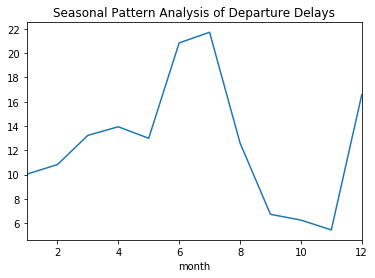

In [129]:
flights_df.groupby(['month'])['dep_delay'].mean().plot(title = 'Seasonal Pattern Analysis of Departure Delays')
plt.show()


The worst months to leave New York City are June and July. There could be a couple of reasons for that: 
This could be because it’s summer and everyone is going out for a holiday. Also, there is a probability that New York is facing summer thunderstorms. One more cause could be long TSA checking queues.

The best month to leave New York City is October/November as the departure delay is the minimum in this month. The possible reason could be because the weather disturbances are minimum.

(d) On average, how do departure delays vary over the course of a day?

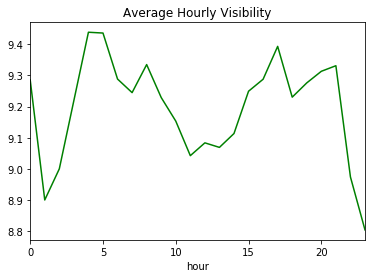

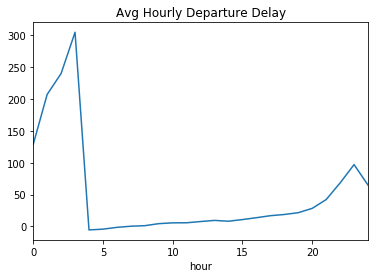

In [131]:
weather_df = pd.read_csv('/Users/manasi/Desktop/weather.csv')
weather_df_wflight = pd.merge(flights_df, weather_df, how='inner', on=['origin','year','month','day','hour'])
weather_df_wflight.groupby('hour')['visib'].mean().plot(title = 'Average Hourly Visibility', color='green')
plt.show()

flights_df.groupby('hour')['dep_delay'].mean().plot(title = 'Avg Hourly Departure Delay')
plt.show()

Departure delays are maximum during 12 am to 3 am when the visibility is very low. When the visibility is high, the delays are very less and the flights are on time.

## Question 3
   Which flight departing NYC in 2013 flew the fastest?

In [132]:
#Calculating speed based on distance travelled and air_time
flights_df['speed'] = flights_df['distance']/flights_df['air_time']

#Filtering based on max overall speed of plane in travelling to its destination
print(flights_df[(flights_df.speed == max(flights_df.speed))])

        Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
216447      216448  2013      5   25    1709.0        9.0    1923.0   

        arr_delay carrier tailnum  flight origin dest  air_time  distance  \
216447      -14.0      DL  N666DN    1499    LGA  ATL      65.0       762   

        hour  minute      speed  
216447  17.0     9.0  11.723077  


Flight 1499 departing NYC flew the fastest. It's speed is 11.72 (unit not known).

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [133]:
eday = pd.DataFrame(flights_df.groupby([flights_df.carrier,flights_df.flight,flights_df.dest]).size().reset_index(name='Count'))

eday[eday.Count == max(eday.Count)]


,carrier,flight,dest,Count
767,AA,59,SFO,365
775,AA,119,LAX,365
783,AA,181,LAX,365
904,AA,1357,SJU,365
914,AA,1611,MIA,365
1118,B6,219,CLT,365
1147,B6,359,BUR,365
1150,B6,371,FLL,365
1169,B6,431,SRQ,365
1243,B6,703,SJU,365


18 flights happen everyday. They fly to LAX, SJU, MIA, SFO, MCO, CLT, BUR, FLL, SRQ, TPA, IAD, HNL and LAS.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


### Did certain carriers have better sense of time while arriving and departing from NYC airports as compared to others?

/Users/manasi/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


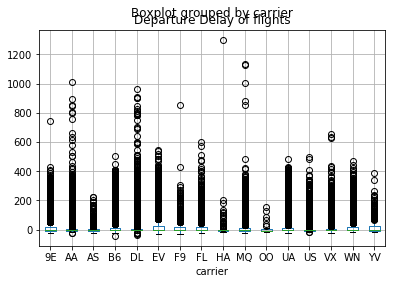

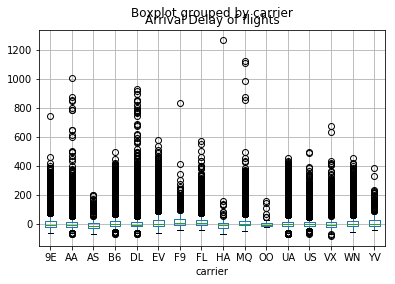

In [134]:
flights_df.boxplot(column='dep_delay', by='carrier')
plt.title('Departure Delay of flights')
plt.show()
flights_df.boxplot(column='arr_delay', by='carrier')
plt.title('Arrival Delay of flights')
plt.show()

From the boxplots above, we see that most of the airlines seem to have median arrival delay of around 0 minutes, but some carriers such as AA, AS and HA seem to have a smaller interquartile range compared to the others. 

Text(0.5,0,'Avg Departure Delay')

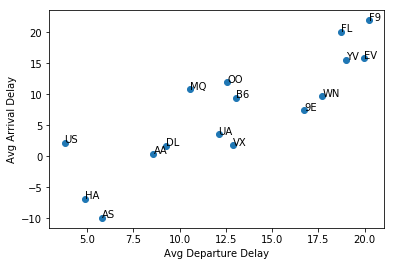

In [135]:
#Help and code from Stackoverflow
m_dep_del = flights_df.groupby('carrier').dep_delay.mean()
m_arr_del = flights_df.groupby('carrier').arr_delay.mean()
carrierlabels = flights_df.carrier.unique()

carrierlabels.sort()

fig, ax = plt.subplots()
ax.scatter(m_dep_del, m_arr_del)

for i, txt in enumerate(carrierlabels):
    ax.annotate(txt, (m_dep_del[i],m_arr_del[i]))
plt.ylabel('Avg Arrival Delay')
plt.xlabel('Avg Departure Delay')

The graph above proves our understanding that HA, AA and AS has lesser departure delays and arrival delays and therefore have better sense of time than the other carriers. 

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

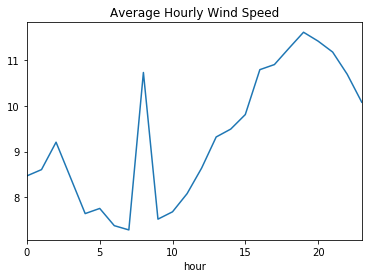

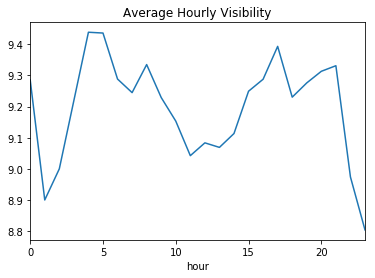

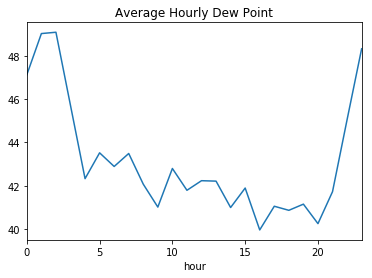

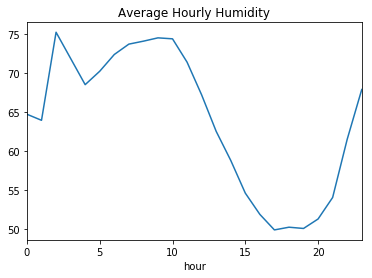

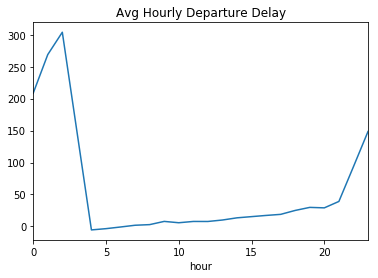

In [141]:
#Considering delayed flights with dep delay greater than 0
flights_df_fd = flights_df[(flights_df.dep_delay>0)] 

#Grouping by origin, hour, day and month
groupby_output = flights_df_fd.groupby([flights_df_fd.origin, flights_df_fd.month, flights_df_fd.day, flights_df_fd.hour])

#Merging the above output with the weather dataset. This is an inner join and the hour-day-month for which 
#data is not present in weather dataset are omitted as per the condition of Inner Join
df_weather_flights_merged = pd.merge(grouped_origin_time_hour, weather_df, how='inner', on=['origin','hour','day','month'])


weather_df_wflight.groupby('hour')['wind_speed'].mean().plot(title = 'Average Hourly Wind Speed')
plt.show()
weather_df_wflight.groupby('hour')['visib'].mean().plot(title = 'Average Hourly Visibility')
plt.show()
weather_df_wflight.groupby('hour')['dewp'].mean().plot(title = 'Average Hourly Dew Point')
plt.show()
weather_df_wflight.groupby('hour')['humid'].mean().plot(title = 'Average Hourly Humidity')
plt.show()
weather_df_wflight.groupby('hour')['dep_delay'].mean().plot(title = 'Avg Hourly Departure Delay')
plt.show()







My idea was to plot the graphs based on hourly data and various factors in the entire day that contribute to the change in the data. Looking at the wind graph, we can see that the with the increase in wind speed, the departure delay also increases. Also, roughly trying to map all the graphs to a common point, we see that the departure delays increases with the increase in the humidity and decreases with the decrease in humidity. Visibility also has a relation with the departure delays. There are more delays when the visibility is low and the dew point is higher. 